# Week 4 - Social Network Analysis  

Install packages and import them.

In [2]:
!pip install pingouin
!pip install --upgrade --force-reinstall git+https://github.com/tantantan12/itom6219.git
import requests
import os
import json
import pandas as pd
import networkx as nx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 14.8 MB/s eta 0:00:00
  Cloning https://github.com/tantantan12/itom6219.git to /tmp/pip-req-build-4sf0lm98
  Running command git clone --filter=blob:none --quiet https://github.com/tantantan12/itom6219.git /tmp/pip-req-build-4sf0lm98
  Resolved https://github.com/tantantan12/itom6219.git to commit e22b2e16673b5f6f6bf082d4cfe59522517dbbc2
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.9/143.9 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 6.0 MB/s eta 0:00:00
   

## 1. Key Concepts of Social Network Analysis
### 1.1 Nodes and Edges
A network or graph is a special representation of entities that have relationships among themselves. It is made up of a collection of two generic objects — (1) node: which represents an entity, and (2) edge: which represents the connection between any two nodes. In a complex network, we also have attributes or features associated with each node and edge. For example, a Twitter user represented as a node may have attributes like followers_count, tweets_count, etc. Similarly, an edge between two persons which represents ‘friend’ connection may have attributes like friends_since, last_meeting, etc.

Relations among actors can be of many different kinds, and each type gives rise to a corresponding network. So, if we measure friendship ties, we have a friendship network, and if we also measure kinship ties among the same people, we have both a friendship network and a kinship network.


It is worth pointing out that when nodes are collectivities, such as firms, there are two different kinds of ties possible. First, there are ties among the firms qua firms – that is, ties that are explicitly between the firms as single entities, such as a joint venture between two firms, an alliance, a purchase agreement, and so on. Second, there are ties between the individual members of the firms. Even though these are not ‘official’ ties between the organizations, they may serve all the same functions. For example, if the chief executive officers of two companies are friends, they may well share considerable information about each other’s organization, constituting a flow of information between the firms.

### 1.2 Directed vs. Undirected Network

In a directed network, relationships are directional. For example, in a Twitter network, Smith might follow Jones but that does not mean that Jones follows Smith. Each directional relationship would have an edge to represent it, typically with an arrow. In an undirected network, relationships are non-directional by nature. For example, in a Facebook network, if Smith is friends with Jones, then Jones is friends with Smith.



### 1.3 Network Representation
How do we represent a network in a way that a computer could understand? This **edge list** would allow us to represent this network.




In the example below, we present the edgelist for the above network. Given the nature of this network being undirected, the order of source and target does not matter. However, for a directed network, an edge starts from the source and goes to the target.

| source | target |
|--------|--------|
|   v1    |   v2    |
|   v2    |   v3    |
|   v2    |   v4    |
|  v3  |  v4 |
|  v4   |  v5    |
|  v4    |  v6    |

In [3]:
import pandas as pd

edges = [
    {"source": "v1", "target": "v2"},
    {"source": "v2", "target": "v3"},
    {"source": "v2", "target": "v4"},
    {"source": "v3", "target": "v4"},
    {"source": "v4", "target": "v5"},
    {"source": "v4", "target": "v6"}
]
df = pd.DataFrame(edges)
df

,source,target
0,v1,v2
1,v2,v3
2,v2,v4
3,v3,v4
4,v4,v5
5,v4,v6


The above code generated a dataframe to store the edgelist. What is the data structure for ```edges```?

Yes! It is a list of **dictionaries**.

----

Here, we introduce a new data structure, **dictionary**. A dictionary in Python is a built-in data structure used to store key-value pairs. It's like a real-life dictionary where each word (key) maps to its definition (value).
- Keys must be unique.
- Values can be any data type.

In [4]:

edgelist1 = {
    "source": "v1",
    "target": "v2",
}
print(edgelist1["source"])  # Output: v1
print(edgelist1.keys())     # Output: dict_keys(['source', 'target'])
print(edgelist1.values())   # Output: dict_values(['v1', 'v2'])

v1
dict_keys(['source', 'target'])
dict_values(['v1', 'v2'])


A list of dictionaries is commonly used when working with tabular data. Each dictionary represents a row, and each key-value pair is a column and its value. We use ```df = pd.DataFrame(edges)``` to translate a list of dictionary into a dataframe.



#### **Practice Exercise: Creating a DataFrame from a List of Dictionaries**

##### Objective:
Learn how to:
- Create a list of dictionaries in Python
- Convert that list into a Pandas DataFrame

##### Instructions:
1. Create a list called `students` that contains dictionaries.  
   Each dictionary should represent one student with the following keys:
   - `'name'`: a string with the student’s name
   - `'age'`: an integer with the student’s age
   - `'grade'`: a string with the student’s grade (e.g., `'A'`, `'B+'`, etc.)

   Create at least 3 student entries.

2. Import `pandas` and convert the `students` list into a DataFrame.

3. Print the resulting DataFrame.

### Example Output:
|     name    | age | grade |
|-------------|-----|-------|
| Alice       |  20 | A     |
| Bob         |  21 | B+    |
| Charlotte   |  22 | A-    |

-----


Now that we have our edgelist ready, the code snippet below generates an **undirected** networkx graph ```G```. Add ```create_using=nx.DiGraph()``` as an additional parameter allows you generate a directed graph.


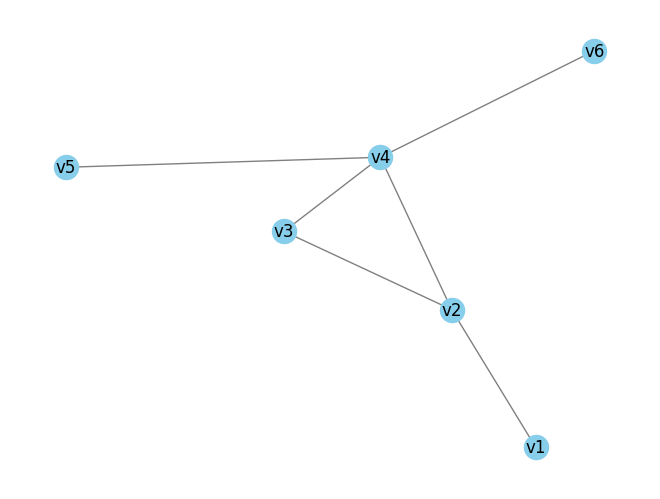

In [5]:
import networkx as nx
# We use the package networkx for social network analysis.
G=nx.from_pandas_edgelist(df,
                            source="source",
                            target="target"
                            #,create_using=nx.DiGraph()
                            )
# The function from_pandas_edgelist allows us to populate a network based on an edgelist.
nx.draw(G, with_labels=True, node_color='skyblue', edge_color='gray',pos = nx.spring_layout(G))


### 1.4 Network Visualization

To visualize this directed network, we just used the function ```nx.draw```.


Below you can find more instructions:

| Parameter      | Description                                                                 |
|----------------|-----------------------------------------------------------------------------|
| `G`            | The graph object (e.g., from `nx.from_pandas_edgelist`)                     |
| `with_labels`  | Whether to display node labels (`True` or `False`)                          |
| `node_color`   | Color of the nodes (e.g., `'skyblue'` or a list of colors)                  |
| `edge_color`   | Color of the edges (e.g., `'gray'`)                                          |
| `pos`          | Layout algorithm for node positions (e.g., `nx.spring_layout(G)`)           |
| `node_size`    | Size of the nodes (can be an integer or a list for individual sizes)        |
| `font_size`    | Font size for node labels                                                   |
| `alpha`        | Transparency of nodes/edges (`0` is transparent, `1` is opaque)             |
| `width`        | Width of the edges                                                          |

If you want to adjust node color or node size based on the attributes of nodes, you will need to generate a list of node colors or node sizes and use them as parameters.

-----

Let's use another example to understand other concepts of network analysis.

> **Karate Club**:
In the Karate Club dataset, each node represents a member of a university karate club, and each edge represents a social connection between two members. These relationships were observed and recorded by Wayne Zachary during his field study of the club in the 1970s.

A relationship (edge) exists between two members if:
- They interact socially outside of official club activities (e.g., they were seen talking, hanging out, or practicing together).
- These connections were based on frequency and strength of observed interactions, as documented by Zachary.
- The relationships are binary: either a tie exists between two members or it doesn’t.

The code below illustrates the edgelist of the Karate Club network.

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# Load the karate club graph
G = nx.karate_club_graph()

# Create edge list DataFrame
df = pd.DataFrame(G.edges(), columns=["source", "target"])
df

,source,target
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
73,30,32
74,30,33
75,31,32
76,31,33


The code below visualizes the Karate Club network.

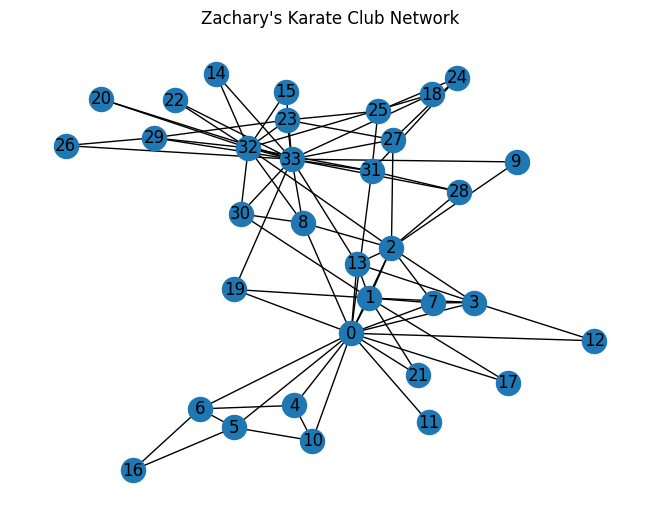

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [8]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.title("Zachary's Karate Club Network")
plt.show()

G.nodes

> Node 0 is the instructor (Mr. Hi) and Note 33 is the manager!



### 1.5 Centrality

After represending the mentioning relationships as a network, we could calculate the centrality for each node using **social network analysis**.


- Degree Centrality. Degree centrality measures how many neighbors a node has. If the network is directed, we have two versions of the measure: **in-degree** is the number of in-coming links; **out-degree** is the number of out-going links.

- Closeness Centrality. Closeness centrality is a measure of the average shortest distance from the focal node to each other node. Specifically, it is the inverse of the average shortest distance between the focal node and all other nodes in the network.

- Betweenness Centrality. Betweenness centrality measures the extent to which a node lies on paths between other nodes. nodes with high betweenness may have considerable influence within a network by virtue of their control over information passing between others.

- Eigenvector. A node’s eigenvector centrality is proportional to the sum of the eigenvector centralities of all nodes directly connected to it. In other words, a node with a high eigenvector centrality is connected to other nodes with high eigenvector centrality. It is useful in determining who is connected to the most connected nodes.


**Calculation of Centrality**


In [9]:
# Create or load a graph
G = nx.karate_club_graph()
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)
# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)
# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

**Add Node Attributes**

The network ```G``` is a complex data structure that can store node-level and edge-level attributes. We add node-level attributes using the function ```set_node_attributes```. This function takes three parameters: the network G, the dictionary of centrality, and the name of this attribute.


In [10]:
nx.set_node_attributes(G, eigenvector_centrality, 'eigenvector_centrality')
nx.set_node_attributes(G, degree_centrality, 'degree_centrality')
nx.set_node_attributes(G, betweenness_centrality, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_centrality, 'closeness_centrality')

You can use the following code to examine all attributes of a network, which are stored at ```G.nodes(data=True)```.


In [11]:
attributes_list=[]
for node, attributes in G.nodes(data=True):
    print(node)
    print(attributes)
    attributes_list.append(attributes)

attributes_df=pd.DataFrame(attributes_list)

0
{'club': 'Mr. Hi', 'eigenvector_centrality': 0.35548349418519426, 'degree_centrality': 0.48484848484848486, 'betweenness_centrality': 0.43763528138528146, 'closeness_centrality': 0.5689655172413793}
1
{'club': 'Mr. Hi', 'eigenvector_centrality': 0.2659538704545024, 'degree_centrality': 0.2727272727272727, 'betweenness_centrality': 0.053936688311688304, 'closeness_centrality': 0.4852941176470588}
2
{'club': 'Mr. Hi', 'eigenvector_centrality': 0.3171893899684447, 'degree_centrality': 0.30303030303030304, 'betweenness_centrality': 0.14365680615680618, 'closeness_centrality': 0.559322033898305}
3
{'club': 'Mr. Hi', 'eigenvector_centrality': 0.21117407832057056, 'degree_centrality': 0.18181818181818182, 'betweenness_centrality': 0.011909271284271283, 'closeness_centrality': 0.4647887323943662}
4
{'club': 'Mr. Hi', 'eigenvector_centrality': 0.0759664588165738, 'degree_centrality': 0.09090909090909091, 'betweenness_centrality': 0.0006313131313131313, 'closeness_centrality': 0.37931034482758


### 1.6 Subnetwork
With node-level attributes, we can generate a subnetwork, which allows the discovery of interesting patterns. This is a useful tool when you work with large networks with hundreds and thousands of notes. Below is the code for generating a subnetwork based on the node attribute of ```degree centrality```.


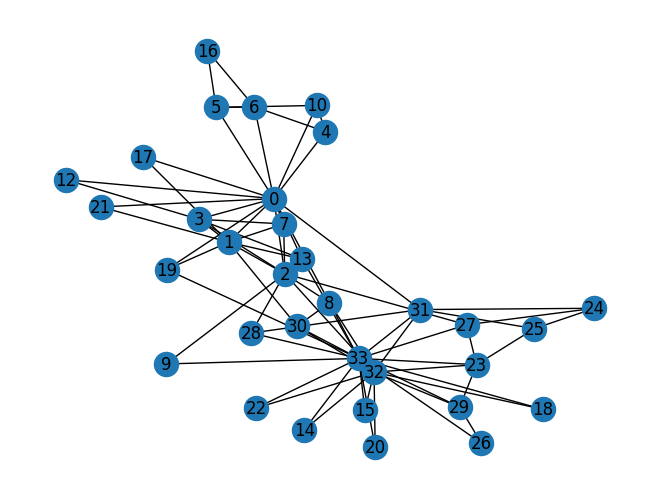

In [12]:
selected_nodes = []
for node, data in G.nodes(data=True):
    if data.get("degree_centrality") > 0.04:
        selected_nodes.append(node)


pos = nx.spring_layout(G)
subgraph = G.subgraph(selected_nodes)
nx.draw(subgraph, pos, with_labels=True)

#nx.draw(subgraph, with_labels=True, node_size=30,node_color='skyblue',width=0.5, edge_color='gray',pos= nx.kamada_kawai_layout(G))

> Optional: How to keep only the 4 nodes with higheset degree?

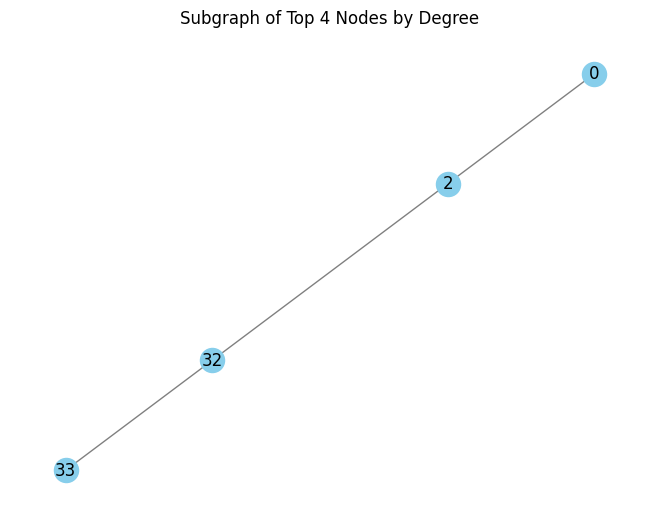

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Assume G is your graph
# Step 1: Get degrees as list of tuples
node_degrees = []
for node in G.nodes():
    deg = G.degree(node)
    node_degrees.append((node, deg))

# Step 2: Sort manually (descending order)
for i in range(len(node_degrees)):
    for j in range(i + 1, len(node_degrees)):
        if node_degrees[j][1] > node_degrees[i][1]:
            temp = node_degrees[i]
            node_degrees[i] = node_degrees[j]
            node_degrees[j] = temp

# Step 3: Select top 4 nodes
selected_nodes = []
count = 0
for pair in node_degrees:
    if count < 4:
        selected_nodes.append(pair[0])
        count += 1

# Step 4: Create subgraph and draw
subgraph = G.subgraph(selected_nodes)
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, with_labels=True, node_color='skyblue', edge_color='gray')
plt.title("Subgraph of Top 4 Nodes by Degree")
plt.show()



### 1.7 Use Network Analysis as Input

We can use centrality measures as input to predict other variables of interest. In the case of the Karate Club network, this becomes particularly compelling due to the real-world context behind the data.

**Motivation**

Zachary’s Karate Club network captures a conflict that arose between the club’s instructor (Mr. Hi) and the club’s administrator. This dispute ultimately led to a split, with members aligning themselves with one of the two leaders. Understanding who sided with whom and why is an important social question. It allows us to explore how network position and social influence might predict real-world behavior in times of conflict or organizational change.

**Outcome of Interest**

The outcome we’re interested in is whether a member went with the admin or the coach after the split. This information is stored in the node attribute club.

Let’s first visualize this by changing the node color based on affiliation: ```club```.


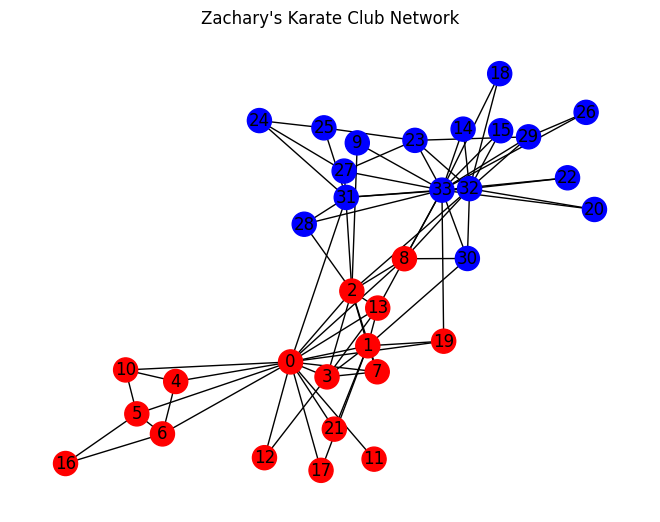

In [14]:

pos = nx.spring_layout(G)

# Draw nodes with colors based on actual club split
node_colors = []
for node in G.nodes():
    if G.nodes[node]['club'] == 'Mr. Hi':
        node_colors.append('red')
    else:
        node_colors.append('blue')

nx.draw(G, pos, with_labels=True, node_color=node_colors) #
plt.title("Zachary's Karate Club Network")
plt.show()


**Data Preparation**

We already learned how to create a dataframe based on a list of dictionaries. Now, we need to prepare for the output and input variables for our linear regression. The column of ```club``` is our outcome but it is a string. We need to turn it into numeric data type in order to use it as the outcome of our regression. The function ```replace``` allows us to specify a dictionary that does this job.


In [15]:
attributes_df['club'] = attributes_df['club'].replace({'Mr. Hi': 1, 'Officer': 0})

<ipython-input-15-741cdf0fef73>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  attributes_df['club'] = attributes_df['club'].replace({'Mr. Hi': 1, 'Officer': 0})


Using replace() in Pandas
In many data analysis tasks, especially when preparing data for statistical modeling or machine learning, we need to convert categorical text labels into numeric values. For example, a column might contain values like 'Mr. Hi' and 'Officer', but regression models require numeric inputs.

> The replace() function in Pandas allows us to map specific values to new ones using a dictionary.
Here's how we use it in our case:
- Replace every 'Mr. Hi' in the club column with 1
- Replace every 'Officer' in the club column with 0

This is a clean and readable way to perform label encoding for binary classification tasks.

**Regression**

In [ ]:
import pingouin as pg
# Combine X and y into a single dataframe
df_model = attributes_df.copy()
# Run linear regression
result = pg.linear_regression(df_model.drop(columns='club'), df_model['club'])
# Round coef and pval to 3 decimal places
result[['names', 'coef', 'pval']] = result[['names', 'coef', 'pval']].round(3)
# Display the rounded result
result[['names', 'coef', 'pval']]


### 1.8 Community Detection
Community detection is a method used in network analysis to identify groups of nodes that are more densely connected to each other than to the rest of the network. The goal is to uncover clusters or communities where relationships are strong within the group and sparse between groups.

One popular method for this task is **greedy modularity maximization**. This algorithm attempts to find the best division of the network into communities by optimizing a quality function called modularity. Modularity compares the actual number of edges within communities to the expected number of such edges in a random network. The greedy approach starts with each node in its own community and then iteratively merges communities to increase modularity until no further improvement is possible.


Modularity $ Q $ measures the strength of division of a network into communities. It compares the actual number of edges within communities to the expected number of such edges in a random network.
$$
Q = \frac{1}{2m} \sum_{i,j} \left( A_{ij} - \frac{k_i k_j}{2m} \right) \delta(c_i, c_j)
$$
Where:
- $ A_{ij}  $is the adjacency matrix (1 if there's an edge between nodes $i$ and $j$, 0 otherwise)
- $k_i$ and $k_j$ are the degrees of nodes $i$ and $j$
- $m$ is the total

In [18]:
from networkx.algorithms.community import greedy_modularity_communities

communities = greedy_modularity_communities(G)

# Display number of communities
print(f"Detected {len(communities)} communities.")


Detected 3 communities.


In the code snippet below, we loop through the detected communities and assign each node a community ID using a dictionary. The dictionary node_community stores the mapping from node to its community.

In [ ]:
# Map each node to a community ID
node_community = {}
for i, comm in enumerate(communities):
    for node in comm:
        node_community[node] = i
        G.nodes[node]['community'] = i



- We use ```colors = []``` to initialize an empty list called colors to store color values for each node.
- Loop through all nodes in the graph G using G.nodes(). Each n represents a node ID.
- For each node n, the code looks up its community ID from the node_community dictionary.
- This dictionary was previously created during community detection and maps each node to a community number (like 0, 1, 2, etc.).
- The community ID is appended to the colors list.
- These IDs are later used to assign different colors to nodes when visualizing the network using something like nx.draw().

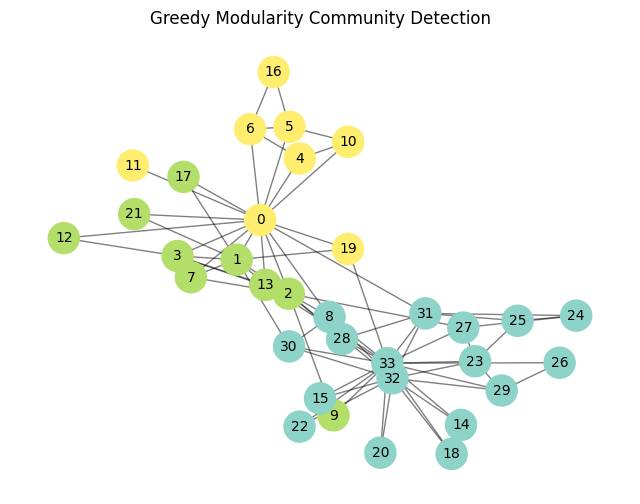

In [19]:

# Visualization

colors = []
for n in G.nodes():
    colors.append(node_community[n])

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos, node_color=colors, cmap=plt.cm.Set3, node_size=500)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title("Greedy Modularity Community Detection")
plt.axis('off')
plt.show()

Processing data to generate a dataframe.

In [20]:
attributes_list=[]
for node, attributes in G.nodes(data=True):
    print(node)
    print(attributes)
    attributes_list.append(attributes)

#attributes_df=pd.DataFrame(attributes_list)

attributes_list

0
{'club': 'Mr. Hi', 'eigenvector_centrality': 0.35548349418519426, 'degree_centrality': 0.48484848484848486, 'betweenness_centrality': 0.43763528138528146, 'closeness_centrality': 0.5689655172413793, 'community': 2}
1
{'club': 'Mr. Hi', 'eigenvector_centrality': 0.2659538704545024, 'degree_centrality': 0.2727272727272727, 'betweenness_centrality': 0.053936688311688304, 'closeness_centrality': 0.4852941176470588, 'community': 1}
2
{'club': 'Mr. Hi', 'eigenvector_centrality': 0.3171893899684447, 'degree_centrality': 0.30303030303030304, 'betweenness_centrality': 0.14365680615680618, 'closeness_centrality': 0.559322033898305, 'community': 1}
3
{'club': 'Mr. Hi', 'eigenvector_centrality': 0.21117407832057056, 'degree_centrality': 0.18181818181818182, 'betweenness_centrality': 0.011909271284271283, 'closeness_centrality': 0.4647887323943662, 'community': 1}
4
{'club': 'Mr. Hi', 'eigenvector_centrality': 0.0759664588165738, 'degree_centrality': 0.09090909090909091, 'betweenness_centrality':

[{'club': 'Mr. Hi',
  'eigenvector_centrality': 0.35548349418519426,
  'degree_centrality': 0.48484848484848486,
  'betweenness_centrality': 0.43763528138528146,
  'closeness_centrality': 0.5689655172413793,
  'community': 2},
 {'club': 'Mr. Hi',
  'eigenvector_centrality': 0.2659538704545024,
  'degree_centrality': 0.2727272727272727,
  'betweenness_centrality': 0.053936688311688304,
  'closeness_centrality': 0.4852941176470588,
  'community': 1},
 {'club': 'Mr. Hi',
  'eigenvector_centrality': 0.3171893899684447,
  'degree_centrality': 0.30303030303030304,
  'betweenness_centrality': 0.14365680615680618,
  'closeness_centrality': 0.559322033898305,
  'community': 1},
 {'club': 'Mr. Hi',
  'eigenvector_centrality': 0.21117407832057056,
  'degree_centrality': 0.18181818181818182,
  'betweenness_centrality': 0.011909271284271283,
  'closeness_centrality': 0.4647887323943662,
  'community': 1},
 {'club': 'Mr. Hi',
  'eigenvector_centrality': 0.0759664588165738,
  'degree_centrality': 0.0

**Regression with Community Data**

In [21]:
import pingouin as pg
attributes_df=pd.DataFrame(attributes_list)
attributes_df['club'] = attributes_df['club'].replace({'Mr. Hi': 1, 'Officer': 0})
attributes_df = pd.get_dummies(attributes_df, columns=['community'], prefix='community')
attributes_df[['community_0', 'community_1', 'community_2']] = attributes_df[['community_0', 'community_1', 'community_2']].astype(int)

# Combine X and y into a single dataframe
df_model = attributes_df.copy()
df_model=df_model.drop(columns='community_0')
# Run linear regression
result = pg.linear_regression(df_model.drop(columns='club'), df_model['club'])

# Round coef and pval to 3 decimal places
result[['names', 'coef', 'pval']] = result[['names', 'coef', 'pval']].round(3)



r2_value = result['r2'].iloc[0]
print(f"\nR² = {r2_value:.3f}")

 # Display the rounded result
result[['names', 'coef', 'pval']]


R² = 0.825


<ipython-input-21-2a9c2bc6626f>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  attributes_df['club'] = attributes_df['club'].replace({'Mr. Hi': 1, 'Officer': 0})


,names,coef,pval
0,Intercept,0.301,0.557
1,eigenvector_centrality,4.711,0.049
2,degree_centrality,-2.148,0.181
3,betweenness_centrality,-0.372,0.764
4,closeness_centrality,-1.475,0.352
5,community_1,0.742,0.000
6,community_2,1.090,0.000


| names                  | coef  | pval |
|------------------------|-------|------|
| Intercept              | 0.301 | 0.557 |
| eigenvector_centrality | 4.711 | 0.049 |
| degree_centrality      | -2.148| 0.181 |
| betweenness_centrality | -0.372| 0.764 |
| closeness_centrality   | -1.475| 0.352 |
| community_1            | 0.742 | 0.000 |
| community_2            | 1.090 | 0.000 |

With this new model, we achieved an R² of 0.825, meaning the model explains 82.5% of the variation in who sided with the coach versus the admin. This shows that combining centrality and community structure provides strong predictive power.


## 2. Application - Twitter

### 2.1 Tweet Search
First, we search on Twitter to identify tweets related to the topic of **GenAI** and **AI Marketing**. Based on these tweets, we will generate a mentioning network and calculate centrality measures for every node in this network. To do this, I've created the functions
search_tweets_by_topic and extract_user_mention_edges.

Data collection takes two steps:
- Collecting tweets based on a topic or keywords
- Extracting edgelist and user attributes from the search output


The most critical part is the specification of the parameters. The first and most important parameter is ```topic```. The search query can be made really complex to include location, sentiment, and even annotation. It can also be used to search for tweets generated by a username (From:username). The tutorial page is [here](https://developer.twitter.com/en/docs/twitter-api/tweets/search/integrate/build-a-query). In our class example, we would like to sample tweets that contain the keywords of "GenAI" or "AI Marketing".

### Example Twitter API Queries

| Use Case                         | Query                                                                                                      | Description                                                                                  |
|----------------------------------|------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------|
| Basic keyword search             | `genai`                                                                                                    | Search tweets containing the word "genai".                                                  |
| Hashtag search                   | `#AIMarketing`                                                                                             | Search tweets containing the hashtag #AIMarketing.                                          |
| Boolean OR                       | `genai OR "AI Marketing"`                                                                                  | Search tweets that include either "genai" or "AI Marketing".                                |
| Negation                         | `genai -marketing`                                                                                         | Tweets that mention "genai" but NOT "marketing".                                            |
| Language filter                  | `genai lang:en`                                                                                            | Tweets containing "genai" in English.                                                        |
| Exclude retweets                 | `genai -is:retweet`                                                                                        | Tweets mentioning "genai" that are not retweets.                                            |
| Location filter                  | `genai place_country:US`                                                                                   | Tweets from the US that mention "genai".                                                    |
| Mention-based filter             | `"AI Marketing" has:mentions`                                                                              | Tweets with "AI Marketing" that mention other users.                                        |
| Media presence                   | `"AI Marketing" has:media`                                                                                 | Tweets with "AI Marketing" and media (image/video).                                         |
| Advanced operator + Boolean      | `("AI Marketing" OR "GenAI") lang:en has:mentions -is:retweet`                                             | English tweets that mention GenAI or AI Marketing, include mentions, and are not retweets. |
| Targeting specific accounts      | `(from:OpenAI OR from:GoogleAI) "GenAI"`                                                                   | Tweets from specific accounts containing "GenAI".                                           |
| Disaster event tracking          | `has:geo (from:NWSNHC OR from:NHC_Atlantic) -is:retweet`                                                   | Geo-tagged tweets from weather accounts during a disaster.                                 |
| Sentiment in media               | `#nowplaying (happy OR excited OR favorite) place_country:US -bad -sucks -disappointing -is:retweet`       | Positive sentiment around #nowplaying in US tweets.                                         |
| Exclude holidays + retweets      | `(genai OR ai) lang:en -holiday -is:retweet`                                                               | English tweets about AI or GenAI that are not retweets or about holidays.                  |
| Grouping and nesting             | `"X data" has:mentions (has:media OR has:links)`                                                           | Tweets with “X data” and mentions, and either media or links.                               |


A desirable feature of the query is that it allows an optional parameter of start_time and end_time so that we can retrieve any tweets generated any time in the past seven days. The limitation is also this time constraint - we can only go back for seven days.


The results of the query is stored as a dictionary, and we need to convert it to two important dataframes, edgelist and user attributes. I created the function ```extract_user_mention_edges``` that takes the input of search results and return both the user attributes and edgelist dataframes.


In [ ]:
import os
from google.colab import userdata
os.environ["BEARER_TOKEN"] =userdata.get('BEARER_TOKEN')

from itom6219 import  user_info, user_tweets, user_tweets_all, search_tweets_by_topic  ,extract_user_mention_edges

tweets_dict = search_tweets_by_topic(
    topic="GenAI OR AI Marketing",
    include_mentions=True,
    max_results=50,
    start_time='2025-03-26T10:14:49Z',
    end_time='2025-03-30T10:14:49Z'
)

print(tweets_dict.keys())  # e.g., ['data', 'meta', 'includes']
user_df, edge_df = extract_user_mention_edges(tweets_dict)
#user_df.to_csv("user_attributes.csv", index=False)
#edge_df.to_csv("mention_edgelist.csv", index=False)

dict_keys(['data', 'includes', 'meta'])



### 2.2 Internal and External Attributes
In the retweet application, we can calculate internal attributes, such as centrality measures, and leverage external attributes, such as public_metrics and verified status. These variables can be used as both inputs and outcomes in a regression to understand the relationship between structural position and visibility or popularity.

To add external attributes (from a DataFrame) to the nodes in a network, we need to iterate over the rows of the DataFrame and convert each row into a dictionary of attributes. This is done using ```.iterrows()``` and ```.to_dict()```.


In [ ]:
edge_df

,source,target
0,Seattleanderson,NTTDATA
1,AI_Valkyr1e,ipfconline1
2,AI_Valkyr1e,nvidia
3,aldiyaz,GeorgeCrudo
4,praisegreat34,kryll_io
5,Aure_Magik,GeorgeCrudo
6,thegrowthcoder,cyberg7digital
7,thegrowthcoder,cyberg7digital
8,fiyllips,ComicsByVieN
9,HAREShiba,ComicsByVieN


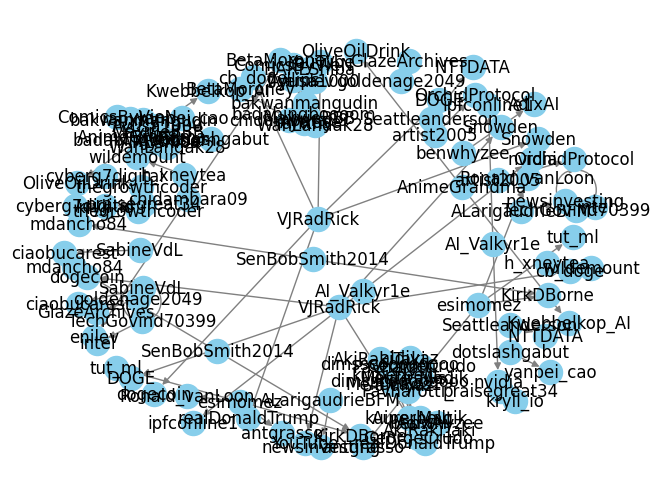

In [ ]:
G=nx.from_pandas_edgelist(edge_df,
                            source="source",
                            target="target",
                            create_using=nx.DiGraph()) # No need to add create_using=nx.DiGraph() if it is an undirected graph


nx.draw(G, with_labels=True, node_color='skyblue', edge_color='gray',pos = nx.spring_layout(G))




In [ ]:
user_df.columns

In Python, you can use the iterrows() function to iterate over rows in a pandas DataFrame. Each row is returned as a pair: the index (row label) and the row itself as a pandas Series.

This is particularly useful when you want to attach attributes to nodes in a network, using external data stored in a DataFrame (e.g., user metadata like follower count, verification status, etc.).

In [ ]:
for index, row in user_df.iterrows():
    node_id = row['username']
    attributes = row.drop('username').to_dict()  # Convert row to dictionary excluding node_id
    nx.set_node_attributes(G, {node_id: attributes})

- user_df.iterrows() goes through each row in the DataFrame user_df.
- row['username'] is used to extract the node ID.
- row.drop('username').to_dict() converts the rest of the row into a dictionary of attributes.
- nx.set_node_attributes(G, {node_id: attributes}) assigns these attributes to the node in the graph G.

**Practice - Visualization**


### 2.3 Edge Prediction

Edge prediction is a key application of network analysis where we aim to infer **which new connections (edges)** are likely to form in the future. This is particularly useful in settings such as:

- Recommending friends in social networks  
- Predicting collaborations or interactions  
- Identifying missing or hidden connections  

In this section, we use the **Jaccard coefficient** as a similarity-based metric to predict the likelihood of an edge existing between two nodes.

$$
> J(u, v) = \frac{|N(u) \cap N(v)|}{|N(u) \cup N(v)|}
> $$

,where $ N(u) $ is the set of neighbors of node *u*.
It measures how **similar** the neighborhoods of two nodes are. A higher Jaccard score implies greater overlap and a higher likelihood that an edge may form between the two nodes.

However, the Jaccard similarity assumes **symmetry** in relationships (e.g., if A is similar to B, then B is similar to A), so it should only be applied to **undirected networks**.

That’s why we first convert our graph `G` to an undirected version before applying Jaccard-based prediction.

In [25]:
G_undirected = G.to_undirected()

# Compute Jaccard similarity between all unconnected node pairs
preds = nx.jaccard_coefficient(G_undirected)

import numpy as np

# Convert preds generator to a list of tuples
preds_list = list(preds)

# Convert to a NumPy array for sorting
preds_array = np.array(preds_list, dtype=object)
print(preds_array)
# Extract the similarity scores (column index 2)
scores = preds_array[:, 2]

# Get sorted indices in descending order
sorted_indices = np.argsort(-scores)

# Apply the sorted indices to the array
sorted_preds = preds_array[sorted_indices]

# Print top 100 predictions
for i in range(min(100, len(sorted_preds))):
    u, v, p = sorted_preds[i]
    print(f"({u}, {v}) -> {p:.4f}")


[[0 32 0.12]
 [0 33 0.13793103448275862]
 [0 9 0.058823529411764705]
 ...
 [29 30 0.3333333333333333]
 [29 31 0.25]
 [30 31 0.25]]
(14, 20) -> 1.0000
(14, 15) -> 1.0000
(14, 18) -> 1.0000
(14, 22) -> 1.0000
(15, 18) -> 1.0000
(15, 20) -> 1.0000
(15, 22) -> 1.0000
(17, 21) -> 1.0000
(18, 20) -> 1.0000
(18, 22) -> 1.0000
(20, 22) -> 1.0000
(7, 13) -> 0.8000
(4, 5) -> 0.7500
(6, 10) -> 0.7500
(9, 28) -> 0.6667
(17, 19) -> 0.6667
(19, 21) -> 0.6667
(13, 19) -> 0.6000
(22, 29) -> 0.5000
(9, 27) -> 0.5000
(14, 29) -> 0.5000
(14, 30) -> 0.5000
(11, 17) -> 0.5000
(11, 21) -> 0.5000
(15, 29) -> 0.5000
(15, 30) -> 0.5000
(22, 30) -> 0.5000
(18, 29) -> 0.5000
(18, 30) -> 0.5000
(11, 12) -> 0.5000
(7, 21) -> 0.5000
(7, 12) -> 0.5000
(7, 17) -> 0.5000
(20, 30) -> 0.5000
(20, 29) -> 0.5000
(8, 13) -> 0.4286
(14, 23) -> 0.4000
(22, 23) -> 0.4000
(7, 19) -> 0.4000
(25, 27) -> 0.4000
(15, 23) -> 0.4000
(12, 13) -> 0.4000
(8, 18) -> 0.4000
(8, 9) -> 0.4000
(8, 15) -> 0.4000
(20, 23) -> 0.4000
(9, 13) ->